# **Introduction** **to** **Machine** **Learning**
---

This session describes the machine learning tools we need to analyze the systems we are interested in. 

🤖🧠 Machine learning is a branch of artificial intelligence that focuses on teaching computers to learn and improve without explicit programming. Implementation of machine learning models allows us to design systems that can automatically identify patterns, make predictions, and take action based on data, rather than relying on human instructions.

🗂️ One of the fundamental concepts in machine learning is classification. This involves assigning items, data points, or observations to predefined categories based on their features. This process is analagous to the way we distinguish between a dog and a bird, where we use the features of each animal to determine the classification. Once the algorithm learns how to distinguish between different inputs, it can then predict the category of a novel input.

Classification algorithms can take a probabilistic approach, rule-based approach, or combination of both. The process of selecting a specific machine learning model is often done in a subjective manner, and the effectiveness of different models can vary depending on the relationships within the data. In this tutorial, we will explore three types of classification models: Logistic Regression model, Random Forest model, and Multi-layer Perceptron.

This tutorial will make use of the scikit-learn Python package. Instructions for installation can be found
[here](https://scikit-learn.org/stable/install.html). We recommend creating a virtual environment to install this package, but that decision is up to the
user. For reference, instructions for how to generate and manage virtual conda environments can be found
[here](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands). You should also have installed the [matplotlib](https://matplotlib.org/stable/users/installing/index.html), [numpy](https://numpy.org/install/), and [pandas](https://pandas.pydata.org/docs/getting_started/install.html) packages.

In this project, we will be using supervised machine learning, meaning that each of our data points will
have a distinct label, which we can then differentiate. This process is analagous to the way we distinguish
between a dog and a bird, where we use the features of each animal to determine the classification. Once
the algorithm learns how to distinguish between different inputs, it can then predict the category of a novel
input.

# 1.1 Decision Tree model

A random forest model is an estimator that fits a number of decision tree classifiers on sub-samples of a dataset, averaging to increase the accuracy of the predictive fitting. Therefore, in order to understand the random forest classifier, we first need to investigate decision trees more simply. A decision tree is a basic rule-based classifier where data is organized into a tree-like structure before classes are assigned to all data points in each leaf node of the tree. To construct the tree structure, you can use dataset features to generate yes/no questions (rules) and repeatedly split the data into smaller subsets until you don't have any more rules to apply or every instance is assigned to a specific class.

The performance of the tree is quantified using a metric called Gini impurity where a lower Gini impurity corresponds to greater variance captured using the given classifier.

## Example: Know your flowers

Here, we examine an example created from sci-kit learn. This example will produce a graphic illustrating
how a decision tree is generated from a dataset.

This example can also be found [here](https://scikit-learn.org/stable/modules/tree.html).

In [ ]:
# Load libraries
from sklearn import tree
import matplotlib.pyplot as plt

# Load data
from sklearn.datasets import load_iris
iris = load_iris()

# Divide the data into features and target
X, y = iris.data, iris.target

# Building decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Visualize
plt.figure(figsize=(10, 7))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, proportion=True)
plt.show()

We can see that conditions of petal and sepal length/width were used to make decisions. Picking the best split is not an easy task and will significantly affect the performance of the classifier. Solving this problem is out of the scope of the tutorial, as here we are only focusing on the concept of the decision tree algorithm to prepare for the following explanation of the Random Forest model.

# 1.2 Random Forest Classifier

🌲🎲🌲 A random forest (RF) algorithm is an expansion of the decision tree algorithm; the classification result of one random forest is decided by the majority vote from all decision trees. (See the below figure)

Scikit-learn provides dozens of built-in machine-learning algorithms and models, called estimators. Each estimator can be fitted to some data using its fit method. For example, follow along with the code below to set up a basic Random Forest Classifier.

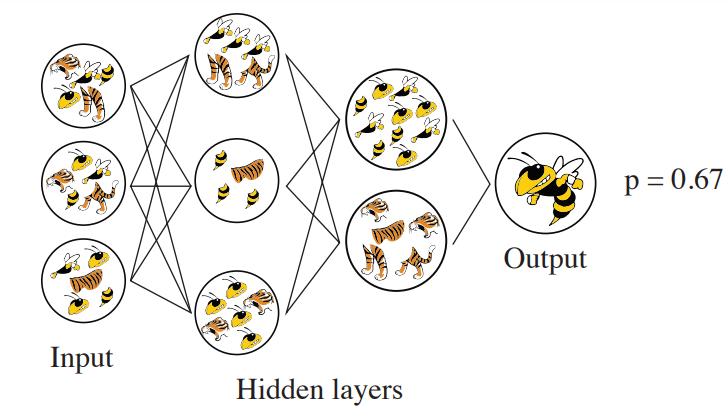


## Example: Using a RF classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = [[ 1,  2,  3],[11, 12, 13]] #2 samples with 3 features each
y = ['0', '1']  # classes of each sample
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y)

We will use a data set, *X*, where the rows represent samples and the columns features of the sample. Here the samples are the vectors [1, 2, 3] and [11, 12, 13]. We then define which classes/groups these samples belong to by defining, *y*, where we say the first sample belongs to *'0'* and the latter belongs to *'1'*. This information is now used to fit and train a RF model, *clf*. The argument ***random_state=0*** is used to ensure that every time we run this function, we will obtain the same result by using the same random seed, which will be helpful for the extent of this tutorial. We will adjust this in the next tutorial in order to increase the resulting accuracy of our model.

Now that we have a trained model, we can use it to predict a classification output for new entries. First,
let’s test our model to make sure that it returns the same y given our initial X:

In [ ]:
clf.predict(X)

As desired, given our training matrix X, our classifier will return y precisely. Since we have validated our
model, we can input other datasets to see what the predicted classifications would be. For instance, let’s use
a very similar, but noticeably different, matrix as input.

We can see that when we use the classfier to predict the classes of our dataset *X*, it gives us the correct prediction. Now, lets try a sample that the classifier has not seen before.

In [ ]:
clf.predict([[4,5,6],[14,15,16]])

**Why do you think it classified [4, 5, 6] into group *A* and [14, 15, 16] into group *B*?** There can be any number of ways this might have happened. Maybe the estimator assumed that single-digit numbers
should return 0. Maybe it wanted the numbers to be greater than 7 for being classified as 1. Such multitude of classifiers is a result of the small dataset (only two data points) which was used to train the model. This can lead to a low accuracy model. Therefore, to help resolve this problem, we will now try to make a more accurate model by using larger datasets

<a name="CP-1"> </a>
## Challenge Problem 1: Going big

> Create a random 2D array of data points between 0 and 100 (we suggest using the numpy randint function). We want each row within our resulting dataset to have three features, following the same format as the previous training data we have been using. However, instead of only two samples, increase this number to 2000 (you should end up with a matrix consisting of random numbers of size 2000 × 3).
>
> Then, create a classification array with the value ‘True’ if a data point’s first value is greater than the second, and ‘False’ otherwise. The third value for each data point is a red herring! Once you have fit your model, create a new set of random data points (of the same size as your training data) and test them against the model for accuracy!
>
> Once you have fit your model, create a new set of random data points and test them against the model for accuracy!
>
> Change the size of the training data ranging from 10 to 150 and plot the accuracy of the model over 10 trials.
>
>> **BONUS:** Now switch your random integer number generator for one that produces a Gaussian distribution. Which estimator yielded better accuracy?

In [ ]:
# Start your solution to the challenge problem here:

<details>
    <summary> Solution 1</summary>
    <pre>
        <code>
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
### Creating a random set of 3000 data points, each using 3 integer values between 0 and 100<br>
data = np.random.randint(0, 100, size=(2000, 3))
y = data[:,0]>data[:,1] ### Classify data
clf = RandomForestClassifier(random_state=0)
clf.fit(data, y)
### Testing new data ###
dataTest = np.random.randint(0,100,size=(1000,3))
model_prediction = clf.predict(dataTest)
actual_result = dataTest[:,0]>dataTest[:,1]
difference = model_prediction[:] == actual_result[:]
accuracy = np.count_nonzero(difference)/np.size(difference)
print("Accuracy of classifier trained on random data =", accuracy)
### Testing different test data sizes ###
size=np.arange(10,201,5)
numtrials = 10
accuracies = []
for i in size:
  trial_acc=[]
  for j in range(0,numtrials):
    data = np.random.randint(0, 100, size=(i, 3))
    y = data[:,0]>data[:,1] ### Classify data
    clf = RandomForestClassifier(random_state=0)
    clf.fit(data, y)
    dataTest = np.random.randint(0,100,size=(1000,3))
    model_prediction = clf.predict(dataTest)
    actual_result = dataTest[:,0]>dataTest[:,1]
    difference = model_prediction[:] == actual_result[:]
    accuracy = np.count_nonzero(difference)/np.size(difference)
    trial_acc.append(accuracy)
  accuracies.append(np.mean(trial_acc))
plt.scatter(size,accuracies,c='k')
plt.plot(size,accuracies,c='k')
plt.xlabel("Number of samples in training data")
plt.ylabel("Accuracies")
plt.title("Accuracy of a RF classifier with increasing size of training data")
plt.show()
###Bonus problem solution
data2 = np.random.normal(50, 10, size=(2000, 3))
y2 = data2[:,0]>data2[:,1]
clf2 = RandomForestClassifier(random_state=0)
clf2.fit(data2, y2)
model2_prediction= clf2.predict(dataTest)
difference = model2_prediction[:] == actual_result[:]
accuracy = np.count_nonzero(difference)/np.size(difference)
print("Accuracy of classifier trained on Gaussian data =", accuracy)
        </code>
    </pre>
</details>

🎯 If you did the bonus, you’ll find that your estimator may have yielded a decently high accuracy (> 95%)
when using the random distribution method. However, you probably found that your test had lower accuracy
when using a normalized Gaussian distribution (around 85%). Further quantifying this level of accuracy will be the focus of the next challenge problem.

# Challenge Problem 1.1
Using the code you developed above, determine the average accuracy of the random forest classifier over 50 trials for a sample data size ranging from 2 to 100 data points. Graph the results of this analysis. It may be helpful to define the accuracy output from the random forest model within a contained function.

In [ ]:
# Start your code here 

<details>
    <summary> 1.1 Solution</summary>
    # Challenge Problem 1.1 Solution # <br>
def RandomForest ( data ):<br>
    y = data [:,0]> data [:,1]<br>
    clf = RandomForestClassifier ( random_state =0)<br>
    clf . fit (data ,y)<br>

    dataTest = np. random . randint (0,100 , size =(1000 ,3))<br>
    prediction = clf . predict ( dataTest )<br>

    trueResult = dataTest [:,0]> dataTest [:,1]<br>
    difference = prediction [:] == trueResult [:]<br>

    Accuracy = np. count_nonzero ( difference )/np. size ( difference )<br>

    return ( Accuracy )<br>

numtrials = 50<br>
sizerange = np. arange (2, 100 )<br>
accuracymat = np. zeros (( len ( sizerange ),numtrials ))<br>

for i_ind , i in enumerate ( sizerange ):<br>
    for j in range (0, numtrials ):<br>
        data = np. random . randint (0,100 , size =(i,3))<br>
        accuracymat [i_ind ,j] = RandomForest ( data )* 100 <br>

plt.plot (accuracymat.mean(axis =1),linewidth =3,color =’k’)<br>
plt.xlabel (’Number of sample datapoints’,fontsize =14)<br>
plt.title (’Random Forest Classifier Accuracy’,fontsize =16)<br>
plt.ylabel (’Accuracy , %’,fontsize =14)
</details>

# 1.3 Logistic Regression Model

0️⃣1️⃣ A logistic regression model is a binary classifier, i.e. it can classify between two groups such as 'Yes' or 'No', 0 or 1, etc. This is different from the RF classifier as a random forest can classify among multiple groups. Logistic regression is a statistical model and hence, uses a probabilistic approach. It models the log-odds (natural log of the ratio of probabilities) as a linear sum (*z*) of the various features ($X_i$) of the sample:

\begin{equation}
\ln\left(\frac{p(X)}{1-p(X)}\right)=z=\beta_0 + \beta_1X_1 + ... + \beta_nX_n
\end{equation}

Here, $p(x)$ is the probability of X belonging to one of the groups (say, group A), $X_i$ is the value of the $i^{th}$ feature of the sample, and $n$ is the number of features.

A Logistic Regression classifier uses the given training data to estimate each of the coefficients involved in calculating the score $z$ using MLE (Maximum Likelihood estimates). In simple terms, it finds values such that the likelihood of the given data following the above equation is maximised. Once it is trained, it can use the coefficients to calculate a score for any input. Then it can calculate the probability using the logistic function:

\begin{equation}
p(X)=\frac{1}{1+e^{-z}}
\end{equation}

If the $p(X)\geq0.5$ then it classifies the input in group A, otherwise it is classified into group B.

We will explore this using an example and also learn how to utilize python for Logistic Regression.

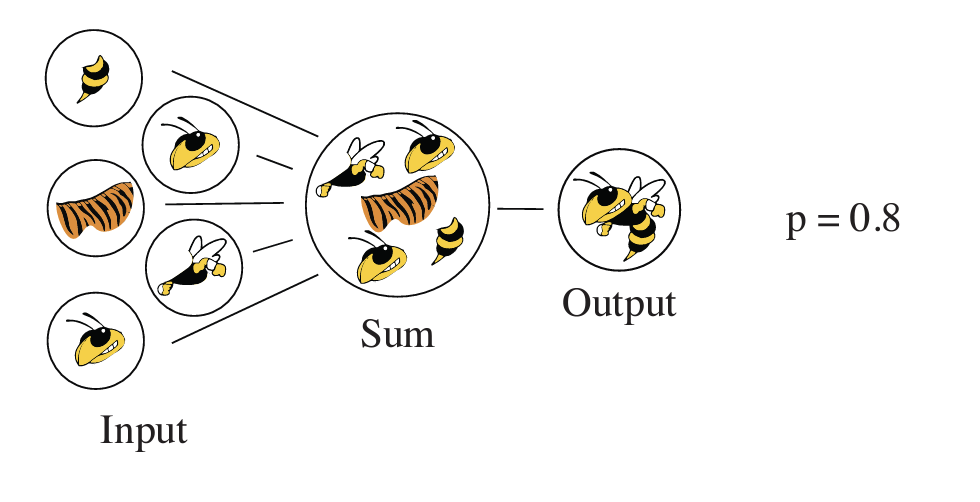

# Example: Will it rain tomorrow?

Let's assume we have a dataset where each sample represents a day using two features: humidity and temperature. We want to use such data to be able to predict if it will rain tomorrow. As you can see, this is a binary classification problem where the classes are "it will rain tomorrow" or "it will not rain tomorrow". In the following code, we will create a mock dataset that will represent our training data:

In [ ]:
import pandas as pd

# Imagine you have a DataFrame `df` with 'Temperature', 'Humidity', and 'WillRainTomorrow' columns
# 'WillRainTomorrow' is 1 if it will rain tomorrow, and 0 otherwise.

df = pd.DataFrame({
    'Temperature': [23, 30, 25, 28, 27, 32, 24, 22, 33, 29],
    'Humidity': [70, 55, 75, 60, 80, 50, 68, 65, 45, 58],
    'WillRainTomorrow': [1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
})

# Split the data into features (X) and target (y)
X = df[['Temperature', 'Humidity']]
y = df['WillRainTomorrow']

print(df)

Now, we will use this data to train a Logistic regression model available in python as part of the *sklearn.linear_model* package ([more info](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) Once, we train the model, we can check what coefficients it calculates using the provided data.

In [ ]:
from sklearn.linear_model import LogisticRegression

#Define a Logistic Regression model
model=LogisticRegression()

#Train the model using X and y
model.fit(X,y)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Thus, using our provided data, the model has learnt to model the probability of raining as logistic fuction of z which is the linear weighted sum of the features: Temperature and humidity.

\begin{equation}
z=-53.32 + 0.65\cdot Temperature + 0.58 \cdot Humidity
\end{equation}

Now, we can use our model to predict if it will rain tomorrow given temperature and humidity of today. Try it with today's temperature and humidity below.

In [ ]:
todays_Temp=24
todays_Humidity=80
X=[[todays_Temp, todays_Humidity]]

R=model.predict(X)
if R[0]==0:
  print("It will not rain tomorrow")
else:
  print("It will rain tomorrow")

Logistic Regression can be used to make a non-binary classification using a method called One vs All (OvA) where a binary model is created for each group and then the classifier that gives the highest probabibility dictates which group the sample belongs in.

Let's say we have three groups 'A', 'B' and 'C'. The classifier will create 3 models -

a) Model that classifies 'A' and not 'A' by calculating $P_A(X)$

b) Model that classifies 'B' and not 'B' by calculating $P_B(X)$

c) Model that classifies 'C' and not 'C' by calculating $P_C(X)$

The classifier will use these three models to calculate the probability for any given input and assign the class based on the highest probability, i.e, if $P_C(X)$ is the highest, then the input will be categorized into group C

The *LogisticRegression()* function by default uses this algorithm when provided training data containing more than 2 classes.

## Challenge Problem 2 : Logs vs Forests

>Using the code you developed in [challenge problem 1](#CP-1), determine the average accuracy of the random forest classifier and logistic regression model over 10 trials for a sample data size ranging from 10 to 100 data points. Graph the results of this analysis and compare the results from both methods.


In [ ]:
# Start your code here

<details>
    <summary>Solution 2</summary>
    <pre>
        <code>
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def RandomForest(data):
    y = data[:,0]>data[:,1]

    clf = RandomForestClassifier(random_state=0)
    clf.fit(data,y)

    dataTest = np.random.randint(0,100,size=(1000,3))
    prediction = clf.predict(dataTest)

    trueResult = dataTest[:,0]>dataTest[:,1]
    difference = prediction[:] == trueResult[:]

    Accuracy = np.count_nonzero(difference)/np.size(difference)
    return(Accuracy)

def LogRegress(data):
    y = data[:,0]>data[:,1]
    if all(y==True) or all(y==False):
        return(float("nan"))
    clf = LogisticRegression(random_state=0)
    clf.fit(data,y)

    dataTest = np.random.randint(0,100,size=(1000,3))
    prediction = clf.predict(dataTest)

    trueResult = dataTest[:,0]>dataTest[:,1]
    difference = prediction[:] == trueResult[:]

    Accuracy = np.count_nonzero(difference)/np.size(difference)
    return(Accuracy)

numtrials = 10
sizerange = np.arange(10,101,2)
accuracymat = np.zeros((len(sizerange),numtrials))

for i_ind, i in enumerate(sizerange):
  for j in range(0,numtrials):
    data = np.random.randint(0,100,size=(i,3))
    accuracymat[i_ind,j] = RandomForest(data)*100


plt.plot(sizerange,accuracymat.mean(axis=1),linewidth=3,color='k',label='Random Forest')
plt.xlabel('Number of sample datapoints',fontsize=14)
plt.title('Classifier Accuracy',fontsize=16)
plt.ylabel('Accuracy, %',fontsize=14)
plt.ylim((50,100))

for i_ind, i in enumerate(sizerange):
    for j in range(0,numtrials):
        data = np.random.randint(0,100,size=(i,3))
        accuracymat[i_ind,j] = LogRegress(data)*100

plt.plot(sizerange,accuracymat.mean(axis=1),linewidth=3,color='r',label='Logistic regression')
plt.legend()
plt.show()
        </code>
    </pre>
</details>

# Challenge Problem 3: Too many impostors

> Repeat the previous challenge problem with a dataset of size 100 with but increase the number of features from 3 to 103 (intervals of 10). Define the classification as before (determined by the first two features). Essentially, this will provide an increasing number of uninformative features (noise) in the dataset.

In [ ]:
# Start your code here
#Using the code you developed in the previous challenge problem, determine the average accuracy of the random forest classifier and logistic regression model over 10 trials for a sample data size ranging from 10 to 100 data points. Graph the results of this analysis and compare the results from both methods.

<details>
    <summary> Solution 3</summary>
    <pre>
        <code>
# Challenge Problem 3 Solution #
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def RandomForest(data,i):
    y = data[:,0]>data[:,1]

    clf = RandomForestClassifier(random_state=0)
    clf.fit(data,y)

    dataTest = np.random.randint(0,100,size=(1000,2+i))
    prediction = clf.predict(dataTest)

    trueResult = dataTest[:,0]>dataTest[:,1]
    difference = prediction[:] == trueResult[:]

    Accuracy = np.count_nonzero(difference)/np.size(difference)
    return(Accuracy)

def LogRegress(data,i):
    y = data[:,0]>data[:,1]
    if all(y==True) or all(y==False):
        return(float("nan"))
    clf = LogisticRegression(random_state=0)
    clf.fit(data,y)

    dataTest = np.random.randint(0,100,size=(1000,2+i))
    prediction = clf.predict(dataTest)

    trueResult = dataTest[:,0]>dataTest[:,1]
    difference = prediction[:] == trueResult[:]

    Accuracy = np.count_nonzero(difference)/np.size(difference)
    return(Accuracy)

numtrials = 10
sizerange = np.arange(1,102,10)
accuracymat = np.zeros((len(sizerange),numtrials))

for i_ind, i in enumerate(sizerange):
  for j in range(0,numtrials):
    data = np.random.randint(0,100,size=(100,2+i))
    accuracymat[i_ind,j] = RandomForest(data,i)*100


plt.plot(sizerange,accuracymat.mean(axis=1),linewidth=3,color='k',label='Random Forest')
plt.xlabel('Number of uninformative features',fontsize=14)
plt.title('Classifier Accuracy',fontsize=16)
plt.ylabel('Accuracy, %',fontsize=14)
plt.ylim((50,100))

for i_ind, i in enumerate(sizerange):
    for j in range(0,numtrials):
        data = np.random.randint(0,100,size=(100,2+i))
        accuracymat[i_ind,j] = LogRegress(data,i)*100

plt.plot(sizerange,accuracymat.mean(axis=1),linewidth=3,color='r',label='Logistic regression')
plt.legend()
plt.show()
        </code>
    </pre>
</details>

# 1.4 Multi-Layer Perceptron

🔗🧠⚡ A Multi-layer Perceptron (MLP) is a supervised neural network model that learns a transformation function to convert input arrays into output arrays based on a training dataset. This sounds similar to the logistic regression model which transforms the data using a linear sum to predict output. This is done using multiple layers of nodes (also referred to as neurons) in a directed graph, with each layer fully connected to the next one. The nodes in the MLP are organized into an input layer, one or more hidden layers, and an output layer.

*   **Input Layer**: This layer consists of nodes corresponding to the input features. Each node in this layer represents an individual feature.
*  **Hidden Layers**: These layers are between the input and output layers. Each node in these layers uses a nonlinear function with the purpose of transforming the inputs into something that the output layer can use. (This is simlar to how in Logistic regression the input features are converted into a z-score as a linear sum and then into a probability)
* **Output Layer**: The final layer is the output layer which is the class label for the sample.

Each node in a layer is connected to all the nodes in the next layer (shown in the below figure). These connections are weighted, and the training data is used to determine weights. There are various algorithms that MLPs can use to solve for the weights. In the example, we will use *lbfgs* because it is efficient for small samples.


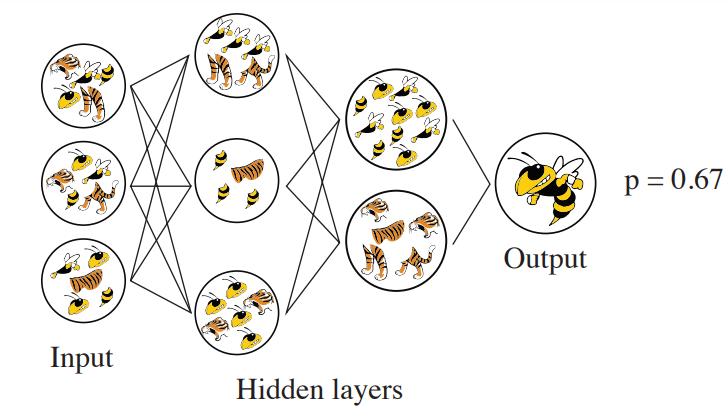


Look more closely at the example flowchart (Figure 13). On the lefthand side, we have the input layer where data (input as some array of size n = 3 here) is fed to the MLP. Each data point represents a different feature of the system. If you were making a script to estimate a human’s weight, you might include input variables like height, age, exercise, number of cinnamon rolls consumed per hour, etc. This data is passed to the hidden layers, which apply a weighted sum of each of the previous layer’s cells (also called Neurons), then transforms them with a non-linear function. This is repeated for the second hidden layer. Finally, the output later transforms the values in the second hidden layer to a usable output. In our example, it would hopefully line up with an expected weight.

MLPs have an advantage over classifiers and other regression models in that they are powerful tools for learning non-linear models and can be modified to adapt to train to data in real-time. However, MLPs can be sensitive to different random initializations as well as feature scaling. Furthermore, MLPs often require tuning parameters such as the number of hidden layers and neurons to obtain high degrees of accuracy. Give the following example a try:

# Example: Using a MLP

In [ ]:
from sklearn.neural_network import MLPClassifier 

X = [[0., 0.], [1., 1.]] 
y = [0, 1]
# the hidden layer size variable tells us that the first hidden layer
# has 3 neurons, the second has 2. (like in the diagram)

clf = MLPClassifier(solver ='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3, 2), random_state=1)

clf.fit(X, y)

# From here, we can make predictions just like using the other models
clf.predict([[2., 2.], [-1.,-2.]])

We now offer a slightly more complex example that you can try. Notice the new functions imported here:

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a random n-class classification problem
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# Create a MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,2,), random_state=0)

# Train the model
mlp.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = mlp.predict(X_test)

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Before we analyze the MLP results, let's look at new functions that can make life easier when testing various ML classifiers:

* **Generating random datasets:** An easy way of creating random datasets to test classifiers using the *make_classification* function of *sklearn.datasets* module. Here we create a dataset of 100 samples with 2 features, where both are informative and no redundancy amongst them.

* **Creating training and testing datasets:** The *train_test_split* from the *sklearn.model_selection* module is a function that helps split our data into a set for training the classifier and a set for testing the classifier. The stratify=y parameter makes sure that the proportion of classes in each set is the same as the proportion of classes in the original data provided.

* **Measuring accuracy:** Previously, we have manually calculated the accuracy of models. A function in python that does the same is *accuracy_score* from the *sklearn.metrics* module.

For using MLP, we use the *MLPclassifier* function of *sklearn.neural_network* module. We define the hidden layer sizes to be used as (5,2,) which means that it will have 2 hidden layers; the first layer will have 5 nodes and the second layer will have 2 nodes. There is no set rule when it comes to deciding the size of the hidden layers. For most problems, a single large hidden layer is sufficient.

# 1.5 Transformers and Pre-Processors

🔧🤖📝 An important aspect of using machine learning is processing the dataset prior to training the ML classifier. Pre-processing involves various transformations that are done to the data to increase accessibility or understandability for the ML classifier. This can improve the accuracy and consistency of results provided by our classifiers. In this section, we will learn to use one of the most commonly used pre-processing methods, **Standardization**.

Let us consider a dataset where one feature is "Years of experience" and another feature is "Salary" in a job. You can imagine that experience will range from 1 to 40 years and salary can range from 10,000 to 1,000,000. Thus, salary will have a greater variance. In this scenario, we know that these differences in variance are due to the different scales at which the features are measured. Hence, to adjust for this we can rescale our data. We rescale the data such that the mean of the feature is 0 and the variance is 1 as follows:

\begin{equation}
    Z_i= \frac{X_i - \bar{X}}{S_X}
\end{equation}

where $X_i$ is the $i^{th}$ value of the feature $X$. By subtracting each value with the average value of the feature ($\bar{X}$), we rescale it such that the new mean of the feature is $0$. Now we can divide it by the standard deviation, $S_X$ to reduce the variance to 1. Hence, we obtain the standardized value for that element which is $Z_i$. By doing these for all our features, we can remove any potentially confounding effects of scaling.

##Example: Standardizing data

The python algorithm used for standardization is the *StandardScaler*. If we provide data formatted as before where each row represents a sample and each column contains measurements of a feature for the sample, the algorithm will standardize the quantities in each feature.


In [ ]:
from sklearn.preprocessing import StandardScaler

data = [[0,0],[1,1],[1,0],[2,1]]
scaler = StandardScaler()
scaler.fit(data)
print(scaler.transform(data))


Now we're going learn how to use a pipeline to apply this transformation (and other transformations as needed) to an estimator.

# 1.6 Pipelines

🚰 Pipelines are end-to-end constructs of various sequential steps that can lead to a desired result. For example, the pipeline to bring you bottled water goes from a natural source to a filtering facility to a packaging facility to a distributor and then finally to you. In machine learning, you can think of the natural source as your data and your result is the bottle of water you receive. The facilities inbetween represent the various pre-processers, transformers and classifiers that you use. This essentially allows us to automate a set of steps such that we can enter the data into the pipeline and then obtain our result without having to manually complete each step.



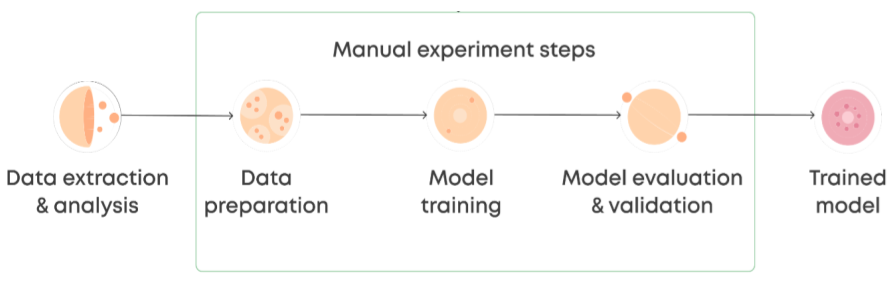

Here, we can see a general flow for a ML algorithm. The manual experiment steps can essentially be automated by defining a pipeline as shown by the green box. If we do so, we can enter our data into the pipeline and get a trained model. The next example will help explain this further.

# Example: Using a pipeline

We will try to define and utilize a pipeline, *pipe*, which takes the data and does the following:
1. Standardizes the data (using *StandardScaler*)
2. Uses a logistic regression classifier

This will be done using the *sklearn.pipeline* module

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# load the iris dataset and split it into train and test sets
X , y = load_iris(return_X_y=True)
X_train , X_test , y_train , y_test = train_test_split (X , y , random_state=0)

For this example, we will use a botanical dataset available in the *sklearn* package. We load and split the dataset into a training set that can be used to develop and train our ML classifier and a test set which can be used to check the accuracy of the trained model.








In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# create a pipeline object
pipe = make_pipeline(StandardScaler() , LogisticRegression())
pipe.fit(X_train, y_train)

Now, we define a pipeline as we had described above using the *make_pipeline* function. This module uses the same API as the classifiers we used previously. Hence we use the *pipe.fit(X_train,y_train)* using the previously created training dataset to train the model. When we enter our data into our pipeline, the program first standardizes the data using *StandardScaler()* and then uses the transformed data to train a *LogisticRegression()* model.

In [ ]:
from sklearn.metrics import accuracy_score

# we can now use it like any other estimator
accuracy_score(pipe.predict(X_test) , y_test)

Now, we can use a function from the *sklearn.metrics* module called *accuracy_score* to test the trained model using the previously created training datasets.

# Challenge Problem 4: Down the Pipeline

> Define two pipelines:
>> Pipeline 1: Standardization followed by a RF classifier
>>
>> Pipeline 2: Standardization followed by Logistic Regression model
>
> Now use two types of random data from: an uniform distribution and a Gaussian distribution to train the models. Compare your model accuracy for the trials
>
> Repeat the measurement several times and plot the resulting accuracies.

In [ ]:
# Start your solution to the challenge problem here:

<details>
    <summary> Solution 4</summary>
    <pre>
        <code>
# Challenge Problem 4 Solution #
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

numtrials=50

#Test using Gaussian data
test_acc_GauRFC = np.zeros(numtrials)
test_acc_GauLog = np.zeros(numtrials)
for i in range(0, numtrials):
    pipe_RF = make_pipeline(StandardScaler() , RandomForestClassifier(random_state=0) )
    pipe_Log = make_pipeline(StandardScaler() , LogisticRegression() )
    X = np.random.normal(50,10,size=(2000,3))
    y = X[:,0] > X[:,1]
    X_train , X_test , y_train , y_test = train_test_split (X, y, random_state=0 )
    pipe_RF.fit(X_train , y_train)
    pipe_Log.fit(X_train , y_train)
    test_acc_GauRFC[i] = accuracy_score(pipe_RF.predict(X_test) , y_test)
    test_acc_GauLog[i] = accuracy_score(pipe_Log.predict(X_test) , y_test)

fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].hist([ test_acc_GauRFC , test_acc_GauLog ], label = ['Random Forest','Logistic Regression'], color = ['cornflowerblue', 'orchid'], bins=20)
axs[0].set_xlabel('Accuracy, Gaussian dist.')
axs[0].legend()

#Test using uniform data
test_acc_GauRFC = np.zeros(numtrials)
test_acc_GauLog = np.zeros(numtrials)
for i in range(0, numtrials):
    pipe_RF = make_pipeline(StandardScaler() , RandomForestClassifier(random_state=0) )
    pipe_Log = make_pipeline(StandardScaler() , LogisticRegression() )
    X = np.random.uniform(0,100,size=(2000,3))
    y = X[:,0] > X[:,1]
    X_train , X_test , y_train , y_test = train_test_split (X, y, random_state=0 )
    pipe_RF.fit(X_train , y_train)
    pipe_Log.fit(X_train , y_train)
    test_acc_GauRFC[i] = accuracy_score(pipe_RF.predict(X_test) , y_test)
    test_acc_GauLog[i] = accuracy_score(pipe_Log.predict(X_test) , y_test)

axs[1].hist([ test_acc_GauRFC , test_acc_GauLog ], label = ['Random Forest','Logistic Regression'], color = ['cornflowerblue', 'orchid'], bins=20)
axs[1].set_xlabel('Accuracy, uniform dist.')
plt.show()
        </code>
    </pre>
</details>

## Challenge Problem 5: Again with MLP


> Just as you can use the LogisticRegression and RandomForestClassifier tools in a pipeline, you can also use the MLPClassifier in the same scenarios.
>
>Starting from the previous challenge problem, augment your code to compare the accuracy between a RandomForestClassifier and the MLPClassifier. Try to make adjustments to increase the accuracy.
>
>>Hint: Consider the size and number of hidden layers, the accuracy parameter alpha, and the random state.

In [ ]:
#Start your code here:

<details>
    <summary> Solution 5</summary>
    <pre>
        <code>
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
## Begin Test for Gaussian RFC ##
test_acc_GauRFC = np.zeros(50)
for i in range(len(test_acc_GauRFC)):
  pipe = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=0))
  X = np.random.normal(50, 10, size=(2000, 3))
  #X = np.random.randint(0, 100, size=(2000, 3))
  y = X[:,0]>X[:,1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
  pipe.fit(X_train, y_train)
  test_acc_GauRFC[i] = accuracy_score(pipe.predict(X_test), y_test)
## Begin Test for Gaussian MLPClassifier##
test_acc_GauMLP = np.zeros(50)
for i in range(len(test_acc_GauMLP)):
  pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", alpha=1e-5, random_state=1, max_iter=2000, early_stopping=True, hidden_layer_sizes=(3,2)))
  X = np.random.normal(50, 10, size=(2000, 3))
  #X = np.random.randint(0, 100, size=(2000, 3))
  y = X[:,0]>X[:,1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
  pipe.fit(X_train, y_train)
  test_acc_GauMLP[i] = accuracy_score(pipe.predict(X_test), y_test)
plt.hist([test_acc_GauRFC,test_acc_GauMLP],label=['Random Forest','MLP'],bins=20)
plt.xlabel('Accuracy')
plt.legend()
        </code>
    </pre>
</details>

# Challenge Problem 6: The only alcohol you will get served

> Create three pipelines that standardize data and classify them using each of the three classifiers taught today.
>
>Use the dataset found [here](https://raw.githubusercontent.com/Sdatta4556/Workshop2023_ML1/main/winequality-red.csv) to train your model. It has 11 variables reporting various features of red wine samples. We will treat quality as the dependent variable.
>
> Now use the dataset found [here](https://raw.githubusercontent.com/Sdatta4556/Workshop2023_ML1/main/winequality-white.csv) which reports the same variables for white wine sample. Predict the quality of these samples and crosscheck with the reported quality. How do the various models compare to each other? Comment on the accuracies.
>
>>Hint: Load the data using pandas with the code: *pd.read_csv(url,delimiter=';')*

In [ ]:
#Start your code here

<details>
    <summary> Solution 6</summary>
<pre>
    <code>
# Challenge Problem 6 Solution #
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import pandas as pd
        
url='https://raw.githubusercontent.com/Sdatta4556/Workshop2023_ML1/main/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')
print(data)

col=data.columns
X_train=data[col[:-1]]
y_train=data['quality']

pipe_RF = make_pipeline(StandardScaler() , RandomForestClassifier())
pipe_Log = make_pipeline(StandardScaler() , LogisticRegression(max_iter=1000) )
pipe_MLP = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(20, 10,),max_iter=10000))

pipe_RF.fit(X_train,y_train)
pipe_Log.fit(X_train,y_train)
pipe_MLP.fit(X_train,y_train)

url='https://raw.githubusercontent.com/Sdatta4556/Workshop2023_ML1/main/winequality-white.csv'
data = pd.read_csv(url, delimiter=';')

col=data.columns
X_test=data[col[:-1]]
y_test=data['quality']

acc_RF=accuracy_score(pipe_RF.predict(X_test),y_test)
acc_Log=accuracy_score(pipe_Log.predict(X_test),y_test)
acc_MLP=accuracy_score(pipe_MLP.predict(X_test),y_test)

print("Accuracy of trained model on red wine dataset using RF:", acc_RF)
print("Accuracy of trained model on red wine dataset using Logistic Regression:", acc_Log)
print("Accuracy of trained model on red wine dataset using MLP:", acc_MLP)</code></pre>
</details>

You will notice that our models have low accuracy in predicting the quality of white wine even though it was trained on a large dataset (>1500 samples). This can be due to two reasons:
    – Red wine is not a good predictor of white wine
    – There are too many unrelated features in our dataset 

There is nothing that can be done to solve the first problem as it is an intrinsic property of the system being studied. However, we can try solving the latter by choosing features that are informative and removing noise from our data. Tomorrow, we will learn how to do so using the protein data of SARS-CoV-2 and SARS-CoV.

📊💻 The quiz below will test your fundamental knowledge of machine learning methods learned in this tuturoial!

In [ ]:
!pip install jupyterquiz

In [ ]:
from IPython.display import IFrame
IFrame('quizzes/Quiz1_b.html', width=800, height=400)